In [2]:
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import numpy as np
from geopandas import GeoDataFrame
from shapely.geometry import Point
from descartes import PolygonPatch
import pandas as pd
import matplotlib.cm

###### Data Source: http://er.ncsbe.gov/downloads.html?election_dt=11/04/2014&nsukey=UpNsurlu3aDzwFok34nfPkhnjPRm0FGD8hqxdpm5a7AtTN%2BqMi8zYiEc0d2OWoE3b81CB%2B6VgvmBaL8lCpFHlcaM9ptYnvmKTsiI54mmarpp7pt0W3GN9dWuul67KA9zqpSVGbQ9nt1S3vALJIxepvdCg78BPYMohi1O%2BMKZajFjLx1zuC%2Fxxrzy7y6pIj%2Fu

In [4]:
PRECINCTS= gpd.read_file("/Users/yiliwang/Documents/Academic/Senior_year/Spring2017/STA160/Polling Data_ precinct level/SBE_PRECINCTS_20140403/PRECINCTS.shp")

In [5]:
PRECINCTS[PRECINCTS['PREC_ID']== '12S']

,COUNTY_ID,COUNTY_NAM,ENR_DESC,OBJECTID,OF_PREC_ID,PREC_ID,Shape_STAr,Shape_STLe,geometry
52,1,ALAMANCE,12S_SOUTH BURLINGTON,82,None,12S,2.629342e+07,23235.774214,"POLYGON ((1874687.016134217 846112.061248228, ..."


In [58]:
PRECINCTS.shape

(2728, 9)

###### 2014 Precinc-level Polling Data

Data Source: http://er.ncsbe.gov/downloads.html?election_dt=11/04/2014&nsukey=UpNsurlu3aDzwFok34nfPkhnjPRm0FGD8hqxdpm5a7AtTN%2BqMi8zYiEc0d2OWoE3b81CB%2B6VgvmBaL8lCpFHlcaM9ptYnvmKTsiI54mmarpp7pt0W3GN9dWuul67KA9zqpSVGbQ9nt1S3vALJIxepvdCg78BPYMohi1O%2BMKZajFjLx1zuC%2Fxxrzy7y6pIj%2Fu

In [7]:
results_pct_20141104 = pd.read_excel('/Users/yiliwang/Documents/Academic/Senior_year/Spring2017/STA160/Polling Data_ precinct level/results_pct_20141104.xlsx')

In [93]:
results_pct_20141104[results_pct_20141104['County']=='BUNCOMBE']

,County,Election Date,Precinct,Contest Group ID,Contest Type,Contest Name,Choice,Choice Party,Vote For,Election Day,One Stop,Absentee by Mail,Provisional,Total Votes
14739,BUNCOMBE,2014-11-04,23.3,1034,S,NC HOUSE OF REPRESENTATIVES DISTRICT 114,Susan C. Fisher,DEM,1,256,124,17,0,397
14740,BUNCOMBE,2014-11-04,19.1,1034,S,NC HOUSE OF REPRESENTATIVES DISTRICT 114,Susan C. Fisher,DEM,1,98,87,10,0,195
14741,BUNCOMBE,2014-11-04,1.1,1034,S,NC HOUSE OF REPRESENTATIVES DISTRICT 114,Susan C. Fisher,DEM,1,389,62,41,0,492
14742,BUNCOMBE,2014-11-04,66.1,1034,S,NC HOUSE OF REPRESENTATIVES DISTRICT 114,Susan C. Fisher,DEM,1,251,193,29,0,473
14743,BUNCOMBE,2014-11-04,2.1,1034,S,NC HOUSE OF REPRESENTATIVES DISTRICT 114,Susan C. Fisher,DEM,1,812,249,30,0,1091
14744,BUNCOMBE,2014-11-04,6.1,1034,S,NC HOUSE OF REPRESENTATIVES DISTRICT 114,Susan C. Fisher,DEM,1,360,185,9,1,555
14745,BUNCOMBE,2014-11-04,12.1,1034,S,NC HOUSE OF REPRESENTATIVES DISTRICT 114,Susan C. Fisher,DEM,1,523,27,10,1,561
14746,BUNCOMBE,2014-11-04,27.2,1034,S,NC HOUSE OF REPRESENTATIVES DISTRICT 114,Susan C. Fisher,DEM,1,164,178,10,0,352
14747,BUNCOMBE,2014-11-04,29.2,1034,S,NC HOUSE OF REPRESENTATIVES DISTRICT 114,Susan C. Fisher,DEM,1,172,139,77,1,389
14748,BUNCOMBE,2014-11-04,43.2,1034,S,NC HOUSE OF REPRESENTATIVES DISTRICT 114,Susan C. Fisher,DEM,1,238,14,7,1,260


In [13]:
polling_prect= pd.merge(PRECINCTS,results_pct_20141104,left_on='PREC_ID',right_on='Precinct',how='inner')

In [22]:
polling_prect[polling_prect['COUNTY_NAM'] == 'ALEXANDER']

,COUNTY_ID,COUNTY_NAM,ENR_DESC,OBJECTID,OF_PREC_ID,PREC_ID,Shape_STAr,Shape_STLe,geometry,County,...,Contest Type,Contest Name,Choice,Choice Party,Vote For,Election Day,One Stop,Absentee by Mail,Provisional,Total Votes
2505,2,ALEXANDER,B1_BETHLEHEM #1,59,None,B1,3.013939e+08,89776.056136,"POLYGON ((1316538.318785548 783686.3222548068,...",ALEXANDER,...,S,NC STATE SENATE DISTRICT 42,Andy Wells,REP,1,579,331,19,0,929
2506,2,ALEXANDER,B1_BETHLEHEM #1,59,None,B1,3.013939e+08,89776.056136,"POLYGON ((1316538.318785548 783686.3222548068,...",ALEXANDER,...,S,NC STATE SENATE DISTRICT 42,Patrice (Pat) Hensley,UNA,1,267,162,9,2,440
2507,2,ALEXANDER,B1_BETHLEHEM #1,59,None,B1,3.013939e+08,89776.056136,"POLYGON ((1316538.318785548 783686.3222548068,...",ALEXANDER,...,S,US SENATE,Barry Gurney (Write-In),NaN,1,0,0,0,0,0
2508,2,ALEXANDER,B1_BETHLEHEM #1,59,None,B1,3.013939e+08,89776.056136,"POLYGON ((1316538.318785548 783686.3222548068,...",ALEXANDER,...,S,US SENATE,David Waddell (Write-In),NaN,1,0,0,0,0,0
2509,2,ALEXANDER,B1_BETHLEHEM #1,59,None,B1,3.013939e+08,89776.056136,"POLYGON ((1316538.318785548 783686.3222548068,...",ALEXANDER,...,S,US SENATE,John Rhodes (Write-In),NaN,1,0,0,0,0,0
2510,2,ALEXANDER,B1_BETHLEHEM #1,59,None,B1,3.013939e+08,89776.056136,"POLYGON ((1316538.318785548 783686.3222548068,...",ALEXANDER,...,S,US SENATE,Kay Hagan,DEM,1,180,125,12,1,318
2511,2,ALEXANDER,B1_BETHLEHEM #1,59,None,B1,3.013939e+08,89776.056136,"POLYGON ((1316538.318785548 783686.3222548068,...",ALEXANDER,...,S,US SENATE,Sean Haugh,LIB,1,51,20,1,0,72
2512,2,ALEXANDER,B1_BETHLEHEM #1,59,None,B1,3.013939e+08,89776.056136,"POLYGON ((1316538.318785548 783686.3222548068,...",ALEXANDER,...,S,US SENATE,Thom Tillis,REP,1,628,351,18,1,998
2513,2,ALEXANDER,B1_BETHLEHEM #1,59,None,B1,3.013939e+08,89776.056136,"POLYGON ((1316538.318785548 783686.3222548068,...",ALEXANDER,...,S,US SENATE,Write-In (Miscellaneous),NaN,1,2,3,0,0,5
2514,2,ALEXANDER,B1_BETHLEHEM #1,59,None,B1,3.013939e+08,89776.056136,"POLYGON ((1316538.318785548 783686.3222548068,...",ALEXANDER,...,S,US HOUSE OF REPRESENTATIVES DISTRICT 05,Joshua (Josh) Brannon,DEM,1,178,125,9,2,314


In [38]:
# Extract data for US Representative
t = ['US HOUSE OF REPRESENTATIVES DISTRICT' in item for item in polling_prect['Contest Name']]
ind_usrepre = [i for i, x in enumerate(t) if x] # return index of true in boolean list
polling_prect_USR = pd.DataFrame([polling_prect.iloc[ind] for ind in ind_usrepre])

In [42]:
polling_prect_USR['Contest Name'].unique()

array([u'US HOUSE OF REPRESENTATIVES DISTRICT 06',
       u'US HOUSE OF REPRESENTATIVES DISTRICT 04',
       u'US HOUSE OF REPRESENTATIVES DISTRICT 01',
       u'US HOUSE OF REPRESENTATIVES DISTRICT 03',
       u'US HOUSE OF REPRESENTATIVES DISTRICT 05',
       u'US HOUSE OF REPRESENTATIVES DISTRICT 02',
       u'US HOUSE OF REPRESENTATIVES DISTRICT 11',
       u'US HOUSE OF REPRESENTATIVES DISTRICT 07',
       u'US HOUSE OF REPRESENTATIVES DISTRICT 08',
       u'US HOUSE OF REPRESENTATIVES DISTRICT 12',
       u'US HOUSE OF REPRESENTATIVES DISTRICT 12 (UNEXPIRED TERM)',
       u'US HOUSE OF REPRESENTATIVES DISTRICT 10',
       u'US HOUSE OF REPRESENTATIVES DISTRICT 09',
       u'US HOUSE OF REPRESENTATIVES DISTRICT 13'], dtype=object)

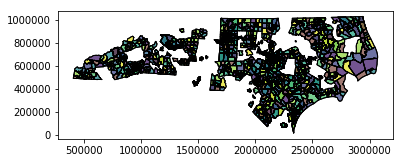

In [68]:
from geopandas import GeoDataFrame

geo_df = GeoDataFrame(polling_prect_USR)
geo_df.plot()

In [113]:
#polling_prect_USR

In [66]:
prect_list = polling_prect_USR['PREC_ID'].unique()
len(prect_list)*2

2506

In [70]:
polling_prect_USR['Choice Party'].unique()

array([u'DEM', u'REP', u'LIB', nan], dtype=object)

In [77]:
# Only extract data with Parties of Democratics and Republicans
df_dem = polling_prect_USR[polling_prect_USR['Choice Party'] == 'DEM']
df_rep = polling_prect_USR[polling_prect_USR['Choice Party'] == 'REP']
# polling_prect_USR_dr = df_dem.append(df_rep, ignore_index=True) # polling_prect_USR_dr: dataframe with only R and D

In [84]:
df_DEM = df_dem[['PREC_ID','Choice','Total Votes','geometry']]
df_DEM.columns = ['PREC_ID','Choice_D','Total Votes_D','geometry']
df_REP = df_rep[['PREC_ID','Choice','Total Votes','geometry']]
df_REP.columns = ['PREC_ID','Choice_R','Total Votes_R','geometry']

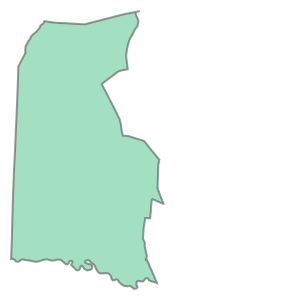

In [87]:
df_REP.iloc[571]['geometry']

In [95]:
BUNCOMBE_county = results_pct_20141104[results_pct_20141104['County']=='BUNCOMBE']

In [102]:
t2 = ['US HOUSE OF REPRESENTATIVES DISTRICT' in item for item in BUNCOMBE_county['Contest Name']]
ind_buncombe = [i for i, x in enumerate(t2) if x] # return index of true in boolean list
BUNCOMBE_vote = pd.DataFrame([BUNCOMBE_county.iloc[ind] for ind in ind_buncombe])

In [106]:
R_BUNCOMBE_vote = sum(BUNCOMBE_vote[BUNCOMBE_vote['Choice Party'] == 'REP']['Total Votes'])

In [107]:
D_BUNCOMBE_vote = sum(BUNCOMBE_vote[BUNCOMBE_vote['Choice Party'] == 'DEM']['Total Votes'])

In [108]:
print R_BUNCOMBE_vote
print D_BUNCOMBE_vote

36993
48791


In [109]:
county_nc= gpd.read_file("/Users/yiliwang/Downloads/COUNTY_BOUNDARY/COUNTY_BOUNDARY.shp")

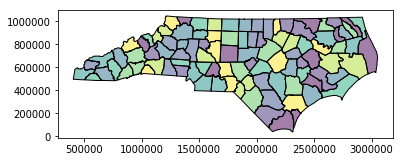

In [111]:
county_nc.plot()

In [112]:
results_pct_20141104

,County,Election Date,Precinct,Contest Group ID,Contest Type,Contest Name,Choice,Choice Party,Vote For,Election Day,One Stop,Absentee by Mail,Provisional,Total Votes
0,ALAMANCE,2014-11-04,64,1056,S,DISTRICT ATTORNEY DISTRICT 15A,Pat Nadolski,DEM,1,403,542,24,2,971
1,ALAMANCE,2014-11-04,12S,1056,S,DISTRICT ATTORNEY DISTRICT 15A,Pat Nadolski,DEM,1,176,75,0,2,253
2,ALAMANCE,2014-11-04,ABSENTEE BY MAIL,1056,S,DISTRICT ATTORNEY DISTRICT 15A,Pat Nadolski,DEM,1,0,0,0,0,0
3,ALAMANCE,2014-11-04,03C,1056,S,DISTRICT ATTORNEY DISTRICT 15A,Pat Nadolski,DEM,1,364,386,37,0,787
4,ALAMANCE,2014-11-04,09N,1056,S,DISTRICT ATTORNEY DISTRICT 15A,Pat Nadolski,DEM,1,252,202,9,0,463
5,ALAMANCE,2014-11-04,13,1056,S,DISTRICT ATTORNEY DISTRICT 15A,Pat Nadolski,DEM,1,452,361,7,1,821
6,ALAMANCE,2014-11-04,4,1056,S,DISTRICT ATTORNEY DISTRICT 15A,Pat Nadolski,DEM,1,370,263,16,0,649
7,ALAMANCE,2014-11-04,7,1056,S,DISTRICT ATTORNEY DISTRICT 15A,Pat Nadolski,DEM,1,262,264,12,1,539
8,ALAMANCE,2014-11-04,12N,1056,S,DISTRICT ATTORNEY DISTRICT 15A,Pat Nadolski,DEM,1,631,433,22,3,1089
9,ALAMANCE,2014-11-04,63,1056,S,DISTRICT ATTORNEY DISTRICT 15A,Pat Nadolski,DEM,1,332,246,17,1,596


In [115]:
c = ['US HOUSE OF REPRESENTATIVES DISTRICT' in item for item in results_pct_20141104['Contest Name']]
ind_c = [i for i, x in enumerate(c) if x] # return index of true in boolean list
voting_USR = pd.DataFrame([results_pct_20141104.iloc[ind] for ind in ind_c])

In [121]:
NC_county = list(voting_USR['County'].unique())

In [138]:
County1 = voting_USR[voting_USR['County']==NC_county[0]]
County1_d = sum(County1[County1['Choice Party'] == 'DEM']['Total Votes'])
County1_r = sum(County1[County1['Choice Party'] == 'REP']['Total Votes'])

In [139]:
print County1_d
print County1_r

18158
25323
